In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255.0


In [27]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, Dropout

model = models.Sequential([
    layers.Dense(784, input_shape=(28 * 28,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    layers.Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    layers.Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    layers.Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    layers.Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    layers.Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),

    layers.Dense(10, activation='softmax')
])


C:\Users\Gurupatil\python notebook\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


In [35]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=128,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop],
                    verbose=2)


Epoch 1/30
469/469 - 24s - 50ms/step - accuracy: 0.8901 - loss: 0.3756 - val_accuracy: 0.9599 - val_loss: 0.1410
Epoch 2/30
469/469 - 14s - 30ms/step - accuracy: 0.9544 - loss: 0.1592 - val_accuracy: 0.9707 - val_loss: 0.1090
Epoch 3/30
469/469 - 14s - 29ms/step - accuracy: 0.9653 - loss: 0.1192 - val_accuracy: 0.9725 - val_loss: 0.0944
Epoch 4/30
469/469 - 14s - 29ms/step - accuracy: 0.9710 - loss: 0.1011 - val_accuracy: 0.9739 - val_loss: 0.0965
Epoch 5/30
469/469 - 14s - 29ms/step - accuracy: 0.9746 - loss: 0.0906 - val_accuracy: 0.9776 - val_loss: 0.0838
Epoch 6/30
469/469 - 14s - 30ms/step - accuracy: 0.9776 - loss: 0.0773 - val_accuracy: 0.9782 - val_loss: 0.0807
Epoch 7/30
469/469 - 14s - 29ms/step - accuracy: 0.9794 - loss: 0.0687 - val_accuracy: 0.9796 - val_loss: 0.0725
Epoch 8/30
469/469 - 14s - 29ms/step - accuracy: 0.9818 - loss: 0.0626 - val_accuracy: 0.9814 - val_loss: 0.0676
Epoch 9/30
469/469 - 14s - 29ms/step - accuracy: 0.9833 - loss: 0.0563 - val_accuracy: 0.9809 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9809 - loss: 0.0733

 Final Test Accuracy: 98.41%


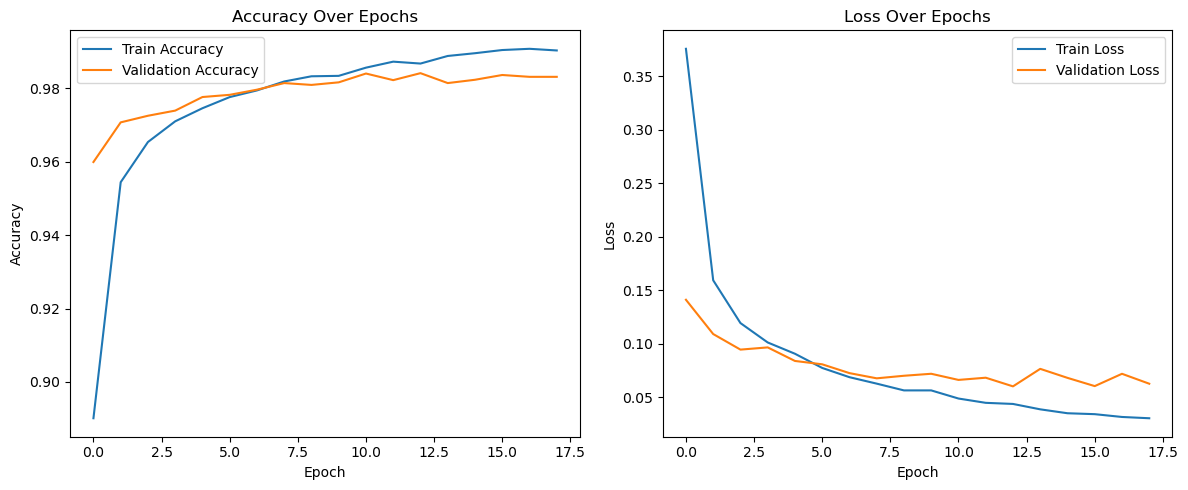

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n Final Test Accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()